# Behavioral data

## GABASnFR Gain adapation + Random delay

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from scipy.signal import medfilt
from scipy.stats import sem, ranksums
%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set(font_scale=2, style='ticks')
t_pre = 10 # time window pre-swim
t_post = 35 # time window post-swim
t_sig = 30 # time used for significance test after swim
t_len = t_pre+t_post
t_flat = 15
t_valid = 21

In [2]:
vol_file = '../Analysis/depreciated/analysis_sections_GA_RD_SnFR.csv'
dat_xls_file = pd.read_csv(vol_file)
dat_xls_file['folder'] = dat_xls_file['folder'].apply(lambda x: f'{x:0>8}')

1.6675213675213676
08042019Fish7-4
36
52
73
31
46


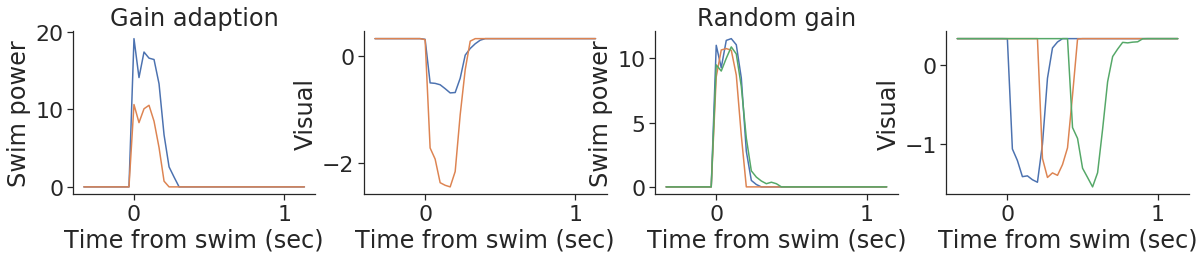

4.408205128205128
08072019Fish1-3
9
8
3
7
6


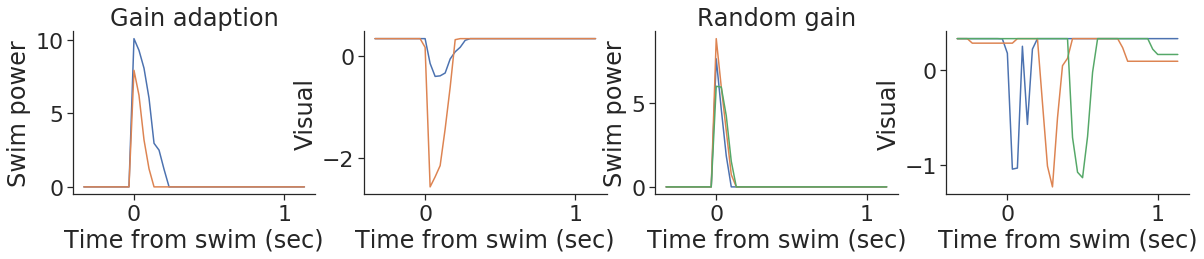

5.124940047961631
08072019Fish2-3
11
14
6
6
6


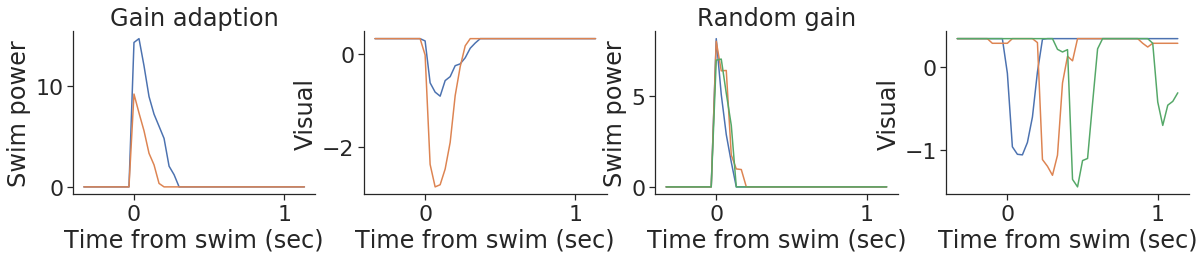

0.9694107062528114
08072019Fish3-3
0
22
1
6
1


/groups/ahrens/home/weiz/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice.
/groups/ahrens/home/weiz/miniconda3/envs/myenv/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/groups/ahrens/home/weiz/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice.


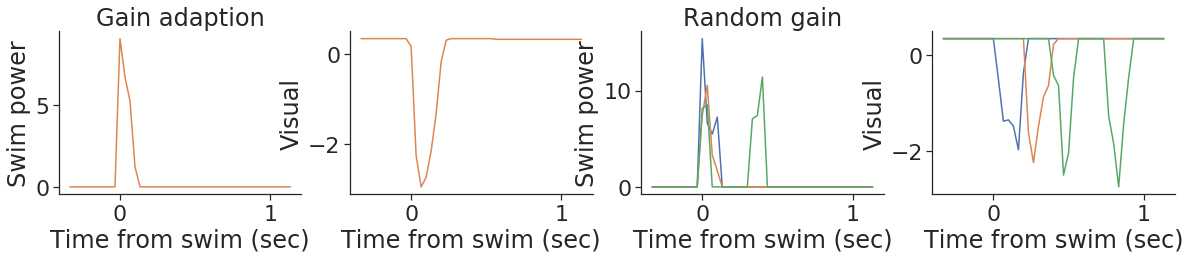

1.1192627206645898
08092019Fish2-3
4
35
16
19
6


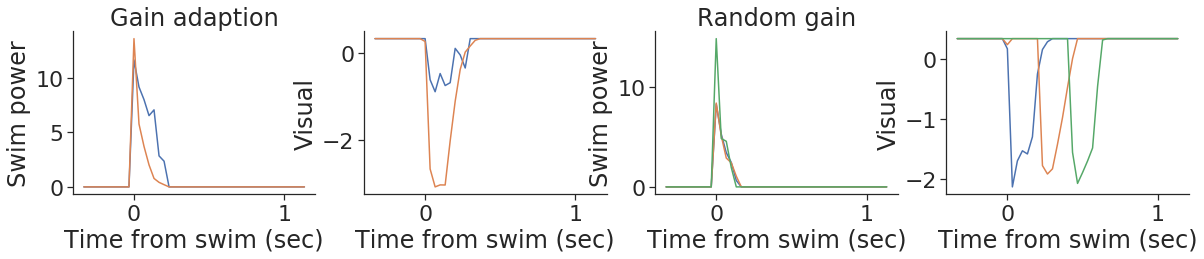

0.9981481481481481
08092019Fish3-3
5
1
0
0
0


/groups/ahrens/home/weiz/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: Mean of empty slice.
/groups/ahrens/home/weiz/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: Mean of empty slice.


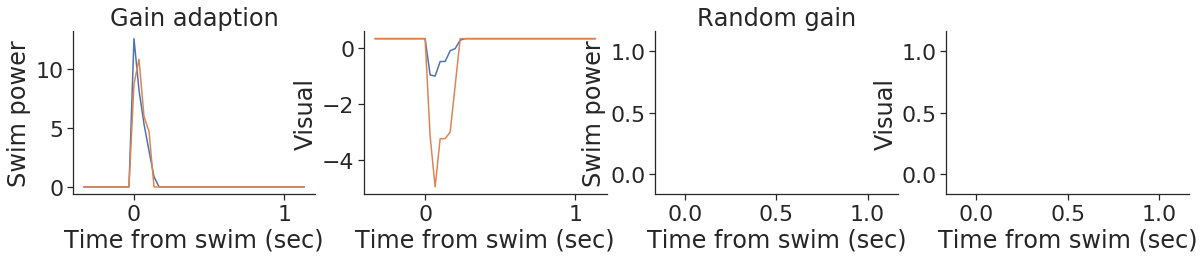

2.923222748815166
08092019Fish4-3
7
25
21
25
14


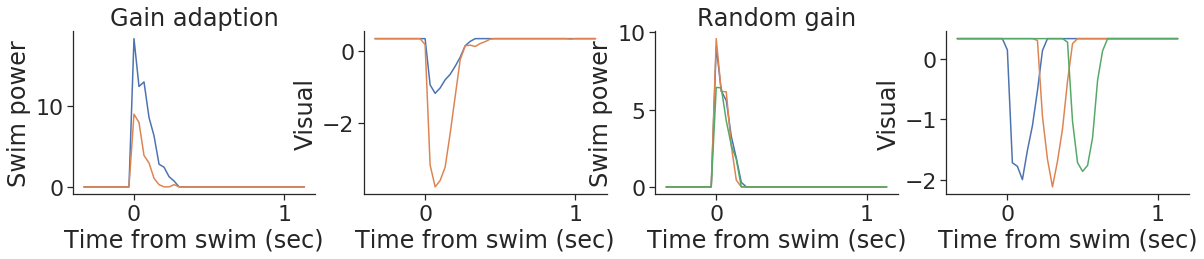

14.61025641025641
08102019Fish1-3
5
0
1
9
3


/groups/ahrens/home/weiz/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice.
/groups/ahrens/home/weiz/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice.


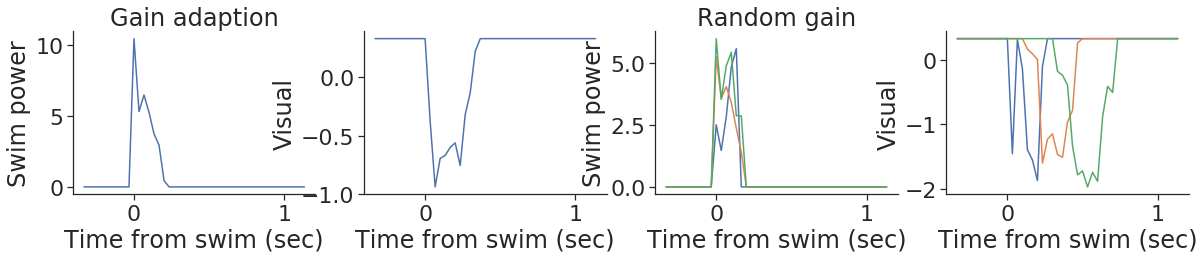

In [3]:
for _, row in dat_xls_file.iterrows():
    folder = row['folder']
    fish = row['fish']
    task_type = row['task']
    if 'Delay' in task_type:
        continue
    _ = np.load(f'../Analysis/swim_power/{folder}_{fish}_swim_dat.npz')
    r_swim = _['r_swim']
    l_swim = _['l_swim']
    task_period = _['task_period'].astype('int')
    task_period_ = _['swim_task_index'].astype('int')
    visu = _['visu']
    p_swim = r_swim + l_swim
    swim_starts = _['swim_starts']
    swim_ends = _['swim_ends']
    swim_len = swim_ends - swim_starts
    valid_trial = (swim_len>1) & (p_swim.sum(axis=-1)>0)
    valid_trial = valid_trial & (p_swim[:, -t_valid:].sum(axis=-1)==0)
    valid_trial = valid_trial & (p_swim[:, :t_pre].sum(axis=-1)==0)
    valid_trial = valid_trial & ((visu[:, :t_pre]<0).mean(axis=-1)==0)
    valid_trial = valid_trial & (((visu[:, -t_valid:]<0).mean(axis=-1)==0) | (task_period_==3))
    valid_trial = valid_trial & ~(((visu[:, :t_pre+10]<0).mean(axis=-1)>0) & (task_period_==3))
    print(np.diff(swim_starts).mean()/30)
    print(folder + fish)
    fig, ax = plt.subplots(1, 4, figsize=(20, 3))
    ax[0].plot(np.arange(-t_pre, t_post)/30, p_swim[valid_trial & (task_period==1)].mean(axis=0))
    ax[0].plot(np.arange(-t_pre, t_post)/30, p_swim[valid_trial & (task_period==3)].mean(axis=0))
    sns.despine()
    ax[0].set_xlabel('Time from swim (sec)')
    ax[0].set_ylabel('Swim power')
    ax[0].set_title('Gain adaption')
    for n in range(3):
        ax[2].plot(np.arange(-t_pre, t_post)/30, p_swim[valid_trial & (task_period_==1+n)].mean(axis=0))
    sns.despine()
    ax[2].set_xlabel('Time from swim (sec)')
    ax[2].set_ylabel('Swim power')
    ax[2].set_title('Random gain')
    ax[1].plot(np.arange(-t_pre, t_post)/30, visu[valid_trial & (task_period==1)].mean(axis=0))
    ax[1].plot(np.arange(-t_pre, t_post)/30, visu[valid_trial & (task_period==3)].mean(axis=0))
    sns.despine()
    print((valid_trial & (task_period==1)).sum())
    print((valid_trial & (task_period==3)).sum())
    ax[1].set_xlabel('Time from swim (sec)')
    ax[1].set_ylabel('Visual')
    for n in range(3):
        ax[3].plot(np.arange(-t_pre, t_post)/30, visu[valid_trial & (task_period_==1+n)].mean(axis=0))
        print((valid_trial & (task_period_==1+n)).sum())
    sns.despine()
    ax[3].set_xlabel('Time from swim (sec)')
    ax[3].set_ylabel('Visual')
    plt.show()